### Feature encoding

---


### **1. Categorical data (categorical to numerical)**


#### 1. Ordinal catagorical data (Ordered data)


#### **Ordinal encoding**


If X has ordinal data, use ordinal encoder
but if y has ordinal data, use label encoder

<img src="../assets/ordinal_encoding.png" />


In [64]:
import os
import pandas as pd

In [65]:
path = os.path.join("..", "data", "customer.csv")

df = pd.read_csv(
    path,
    dtype={
        "gender": "category",
        "review": "category",
        "education": "category",
        "purchased": "category",
    },
)
df.sample(5)

,age,gender,review,education,purchased
4,16,Female,Average,UG,No
13,57,Female,Average,School,No
11,74,Male,Good,UG,Yes
44,77,Female,Average,UG,No
36,34,Female,Good,UG,Yes


In [66]:
print(df["review"].cat.categories)
print(df["education"].cat.categories)
print(df["purchased"].cat.categories)

Index(['Average', 'Good', 'Poor'], dtype='object')
Index(['PG', 'School', 'UG'], dtype='object')
Index(['No', 'Yes'], dtype='object')


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("purchased", axis=1), df["purchased"]
)

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

ct = ColumnTransformer(
    [
        (
            "ordinal",
            OrdinalEncoder(
                categories=[["Poor", "Good", "Average"], ["School", "UG", "PG"]],
            ),
            ["review", "education"],
        ),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['Poor', 'Good',
                                                             'Average'],
                                                            ['School', 'UG',
                                                             'PG']]),
                                 ['review', 'education'])])

In [69]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.transform(X_test)

In [70]:
X_train.sample(5), X_train_trans.sample(5)

(    age  gender   review education
 24   16  Female  Average        PG
 45   61    Male     Poor        PG
 35   74    Male     Poor    School
 10   98  Female     Good        UG
 27   69  Female     Poor        PG,
     ordinal__review  ordinal__education  remainder__age remainder__gender
 36              1.0                 1.0              34            Female
 1               0.0                 1.0              68            Female
 16              0.0                 1.0              59              Male
 21              2.0                 2.0              32              Male
 34              2.0                 0.0              86              Male)

#### **Label encoding**


In [71]:
le = LabelEncoder()
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.transform(y_test)

---


#### 2. Nominal catagorical data (Unordered data)


#### **One hot encoding**


N categorical data is converted in n seperate column

<img src="../assets/onehot_encoding.png" />


Since the sum of all the column of each row is 1 now, this leads to **dummy variable trap** and introduction of **multicolinearity**.


**Multicollinearilty** is extremely bad for linear models as it changes the correlation of data.
Also, in ML, features should be independent from each other to yield maximum results.


To combat this problem, one of the columns is removed from the generated column.
Hence for **n** categories, only **n-1** columns are now generated.


In [72]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [73]:
path = os.path.join("..", "data", "cars.csv")

df = pd.read_csv(path)
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
6404,Maruti,80000,Petrol,Second Owner,200000
4160,Maruti,62000,Petrol,First Owner,50000
1071,BMW,28156,Diesel,First Owner,6000000
2786,Tata,120000,Diesel,Second Owner,229999
6967,Honda,56494,Petrol,First Owner,550000


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("selling_price", axis=1), df["selling_price"]
)
X_train.sample(5), y_train.sample(5)

(         brand  km_driven    fuel         owner
 727   Mahindra     175000  Diesel   Third Owner
 4588  Mahindra     100000  Diesel  Second Owner
 3711      Tata      80000  Diesel  Second Owner
 3650   Hyundai      90000  Diesel   First Owner
 1903    Maruti      55000  Diesel   First Owner,
 3239    4100000
 5352     889000
 5343     225000
 3950     550000
 7749    1380000
 Name: selling_price, dtype: int64)

In [75]:
ct = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(drop="first", sparse_output=False), ["brand", "fuel"]),
        ("ordinal", OrdinalEncoder(), ["owner"]),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['brand', 'fuel']),
                                ('ordinal', OrdinalEncoder(), ['owner'])])

In [76]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.transform(X_test)

In [77]:
X_train_trans.sample(5)

,ohe__brand_Ashok,ohe__brand_Audi,ohe__brand_BMW,ohe__brand_Chevrolet,ohe__brand_Daewoo,ohe__brand_Datsun,ohe__brand_Fiat,ohe__brand_Force,ohe__brand_Ford,ohe__brand_Honda,...,ohe__brand_Skoda,ohe__brand_Tata,ohe__brand_Toyota,ohe__brand_Volkswagen,ohe__brand_Volvo,ohe__fuel_Diesel,ohe__fuel_LPG,ohe__fuel_Petrol,ordinal__owner,remainder__km_driven
3071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,35000
7077,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20000
2419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,60000
7833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,28000
2358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50000


---


### **2. Numerical data (numerical to categorical)**


#### **1. Discretization (Binning)**


Binning is used to -

* better the value spread
* handle the outliers in the data

<img src="../assets/binning.png"/>


##### **Unsupervised binning**


* **Equal width binning / Uniform binning**


Just like creating histograms, the data is equally spread into n bins, based on the range decided by -

range = (max - min) / bins


In [78]:
import os
import pandas as pd

In [79]:
path = os.path.join("..", "data", "titanic.csv")

df = pd.read_csv(path, usecols=["PassengerId", "Age", "Fare", "Survived"])
df.dropna(inplace=True)
df.sample(5)

,PassengerId,Survived,Age,Fare
325,326,1,36.0,135.6333
85,86,1,33.0,15.8500
432,433,1,42.0,26.0000
499,500,0,24.0,7.7958
113,114,0,20.0,9.8250


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Survived", axis=1), df["Survived"]
)
X_train.sample(5)

,PassengerId,Age,Fare
842,843,30.0,31.0000
258,259,35.0,512.3292
0,1,22.0,7.2500
658,659,23.0,13.0000
686,687,14.0,39.6875


In [81]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "binning",
            KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="uniform"),
            ["Age", "Fare"],
        ),
    ],
    remainder="passthrough",
)

ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('binning',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='uniform'),
                                 ['Age', 'Fare'])])

In [82]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.fit_transform(X_test)

In [83]:
X_train_trans.sample(5)

,binning__Age,binning__Fare,remainder__PassengerId
626,7.0,0.0,627
647,6.0,0.0,648
499,2.0,0.0,500
686,1.0,0.0,687
704,3.0,0.0,705


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='binning__Fare', ylabel='Density'>

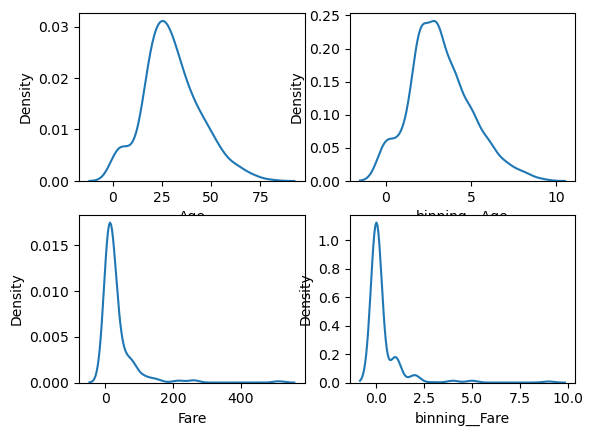

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt


figure, ((first, second), (third, fourth)) = plt.subplots(ncols=2, nrows=2)
sns.kdeplot(X_train, x="Age", ax=first)
sns.kdeplot(X_train_trans, x="binning__Age", ax=second)
sns.kdeplot(X_train, x="Fare", ax=third)
sns.kdeplot(X_train_trans, x="binning__Fare", ax=fourth)

---


* **Equal frequency binning / Quantile binning**


Equal percentage(quntile) of the population is spread across all bins.
Say, if you want 10 bins, then each bin will contain 10 percentile of the data


In [85]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "binning",
            KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile"),
            ["Age", "Fare"],
        ),
    ],
    remainder="passthrough",
)

ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('binning',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 ['Age', 'Fare'])])

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='binning__Fare', ylabel='Density'>

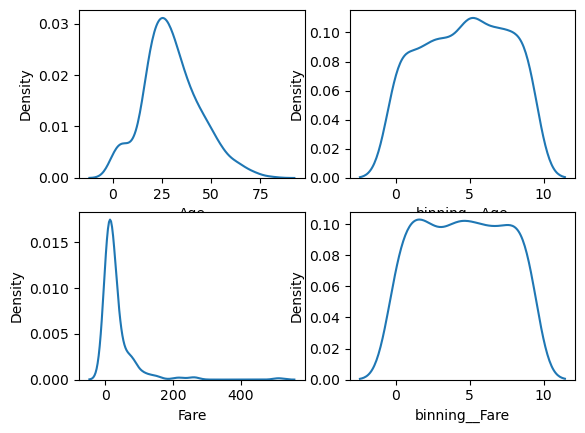

In [86]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.fit_transform(X_test)

import seaborn as sns
import matplotlib.pyplot as plt

figure, ((first, second), (third, fourth)) = plt.subplots(ncols=2, nrows=2)
sns.kdeplot(X_train, x="Age", ax=first)
sns.kdeplot(X_train_trans, x="binning__Age", ax=second)
sns.kdeplot(X_train, x="Fare", ax=third)
sns.kdeplot(X_train_trans, x="binning__Fare", ax=fourth)

---


* **K-means binning**


In [87]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "binning",
            KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="kmeans"),
            ["Age", "Fare"],
        ),
    ],
    remainder="passthrough",
)

ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('binning',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='kmeans'),
                                 ['Age', 'Fare'])])

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

<Axes: xlabel='binning__Fare', ylabel='Density'>

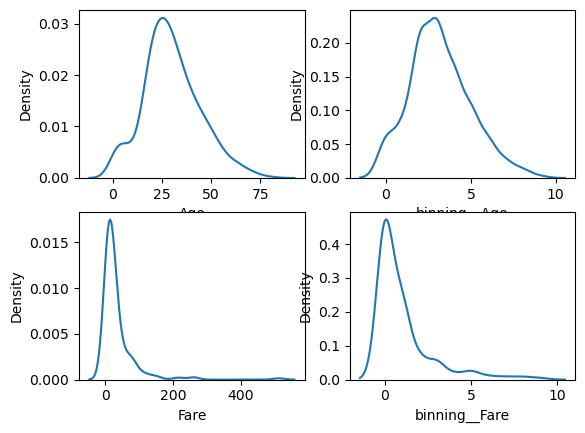

In [88]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.fit_transform(X_test)

import seaborn as sns
import matplotlib.pyplot as plt

figure, ((first, second), (third, fourth)) = plt.subplots(ncols=2, nrows=2)
sns.kdeplot(X_train, x="Age", ax=first)
sns.kdeplot(X_train_trans, x="binning__Age", ax=second)
sns.kdeplot(X_train, x="Fare", ax=third)
sns.kdeplot(X_train_trans, x="binning__Fare", ax=fourth)

---


#### **2. Binarization**


Convert the data to either 0 or 1.


In [89]:
from sklearn.preprocessing import Binarizer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [("binarizer", Binarizer(threshold=10), [])], remainder="passthrough"
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('binarizer', Binarizer(threshold=10), [])])

---
